In [1]:

import numpy as np
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from tpot import TPOTRegressor

import warnings
warnings.filterwarnings('ignore')

C:\Users\alex1\AppData\Local\Programs\Python\Python310\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
# загрузил датасет
car_price = pd.read_csv('/Users/evgenijselisev/Desktop/car_price_prediction.csv')

# посмотрел данные
car_price.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [129]:
car_price.columns


Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [130]:
print(list(car_price['Levy'].unique()))
# посмотрел значения во столбце Levy - сумма налогоболажения, есть значение "-", заменяю его на 0

['1399', '1018', '-', '862', '446', '891', '761', '751', '394', '1053', '1055', '1079', '810', '2386', '1850', '531', '586', '1249', '2455', '583', '1537', '1288', '915', '1750', '707', '1077', '1486', '1091', '650', '382', '1436', '1194', '503', '1017', '1104', '639', '629', '919', '781', '530', '640', '765', '777', '779', '934', '769', '645', '1185', '1324', '830', '1187', '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811', '988', '917', '1156', '687', '11714', '836', '1347', '2866', '1646', '259', '609', '697', '585', '475', '690', '308', '1823', '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872', '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333', '1325', '247', '879', '1342', '1327', '1598', '1514', '1058', '738', '1935', '481', '1522', '1282', '456', '880', '900', '798', '1277', '442', '1051', '790', '1292', '1047', '528', '1211', '1493', '1793', '574', '930', '1998', '271', '706', '1481', '1677', '1661', '1286', '1408', '1090', '595

In [131]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [3]:
for column in car_price.columns:
    nan_count = car_price[column].isnull().sum()
    total_count = len(car_price[column])
    percentage = nan_count/total_count*100
    print(f'Процент NaN значений в столбце {column} равен {percentage}%')
# вывод процента пропущеннных значений по столбцам  

Процент NaN значений в столбце ID равен 0.0%
Процент NaN значений в столбце Price равен 0.0%
Процент NaN значений в столбце Levy равен 0.0%
Процент NaN значений в столбце Manufacturer равен 0.0%
Процент NaN значений в столбце Model равен 0.0%
Процент NaN значений в столбце Prod. year равен 0.0%
Процент NaN значений в столбце Category равен 0.0%
Процент NaN значений в столбце Leather interior равен 0.0%
Процент NaN значений в столбце Fuel type равен 0.0%
Процент NaN значений в столбце Engine volume равен 0.0%
Процент NaN значений в столбце Mileage равен 0.0%
Процент NaN значений в столбце Cylinders равен 0.0%
Процент NaN значений в столбце Gear box type равен 0.0%
Процент NaN значений в столбце Drive wheels равен 0.0%
Процент NaN значений в столбце Doors равен 0.0%
Процент NaN значений в столбце Wheel равен 0.0%
Процент NaN значений в столбце Color равен 0.0%
Процент NaN значений в столбце Airbags равен 0.0%


In [4]:
car_price_enc = car_price.copy()
def floati(x):
    s = list(map(str,x.split()))
    return float(s[0])
def levy(x):
    if x == '-':
        return 0
    return int(x)
car_price_enc['Engine volume'] = car_price['Engine volume'].apply(floati)
car_price_enc['Mileage'] = car_price['Mileage'].apply(floati)
car_price_enc['Levy'] = car_price['Levy'].apply(levy)
car_price_enc.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
car_price_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  int64  
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  float64
 10  Mileage           19237 non-null  float64
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

<AxesSubplot: >

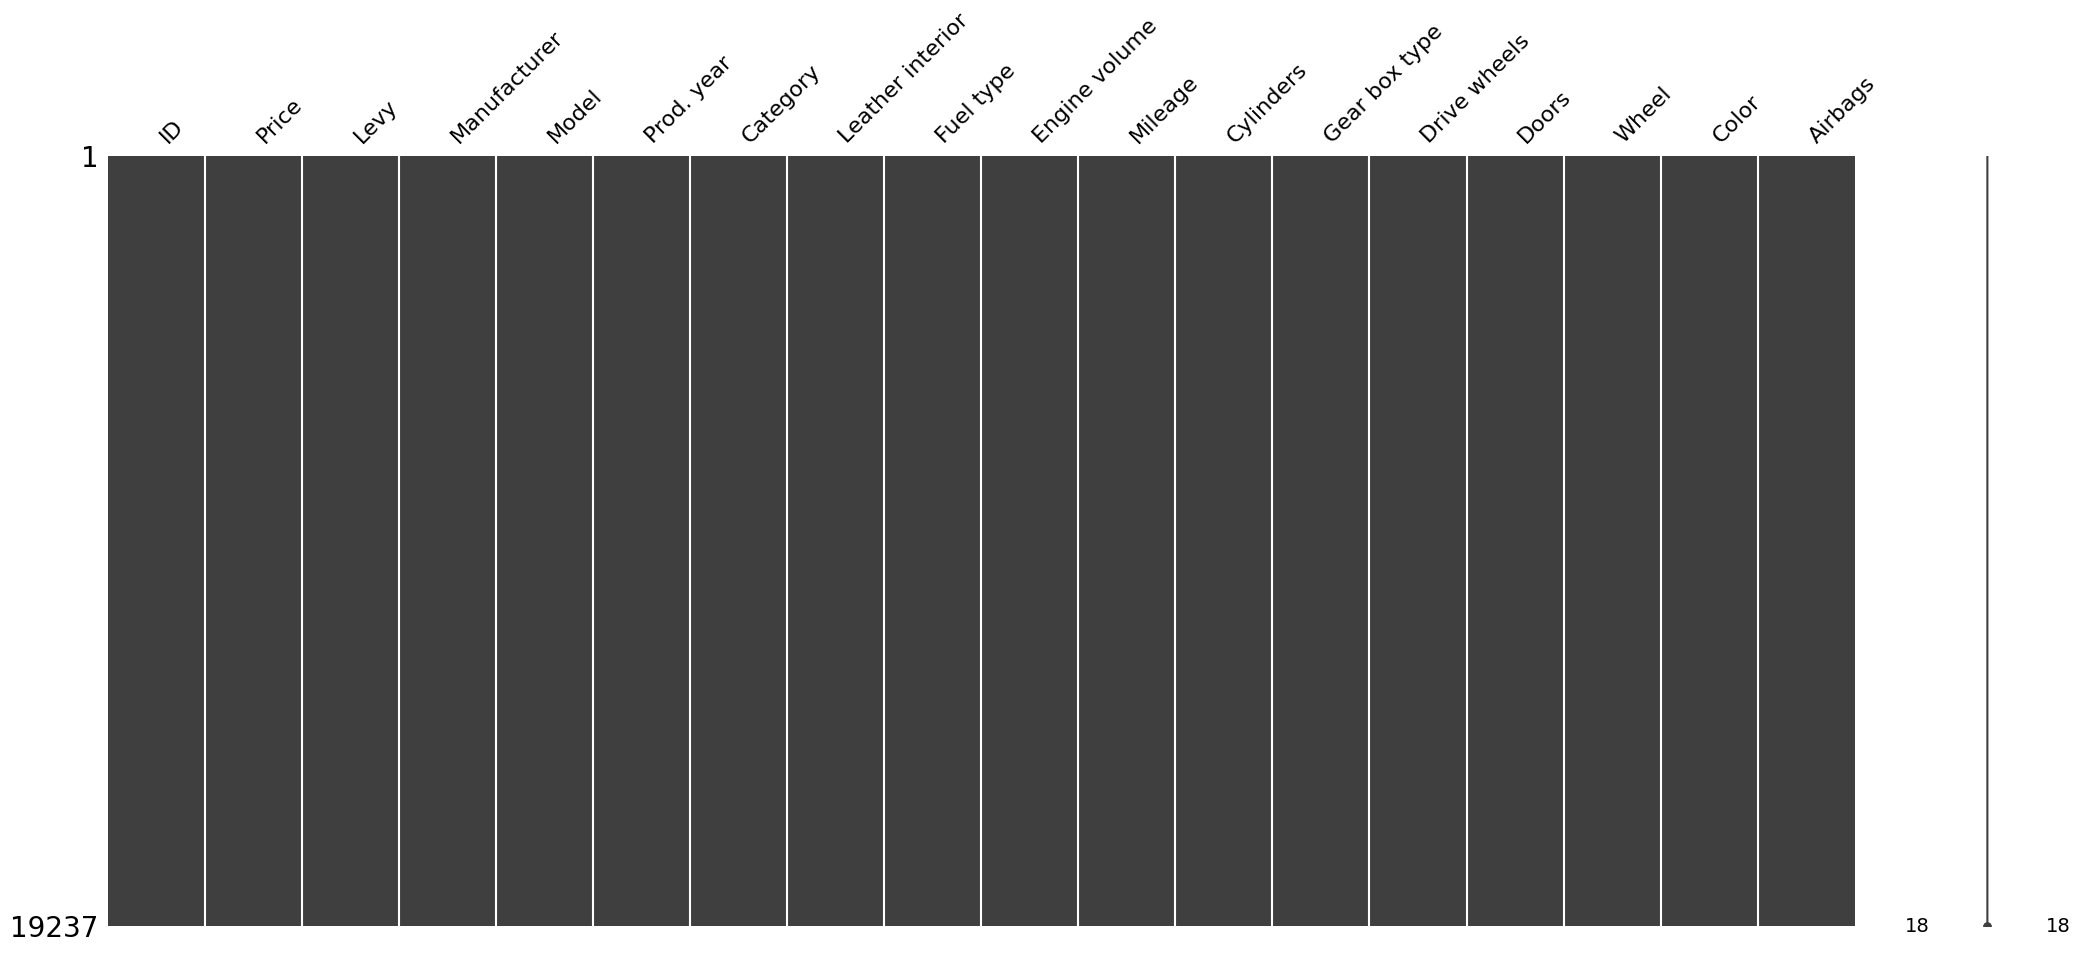

In [6]:
msn.matrix(car_price_enc)
#построил матрицу Null значений`

In [7]:
car_price_enc.describe()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,632.528669,2010.912824,2.307990,1.532236e+06,4.582991,6.582627
std,9.365914e+05,1.905813e+05,567.721688,5.668673,0.877805,4.840387e+07,1.199933,4.320168
min,2.074688e+07,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,0.000000,2009.000000,1.800000,7.013900e+04,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,642.000000,2012.000000,2.000000,1.260000e+05,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,917.000000,2015.000000,2.500000,1.888880e+05,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


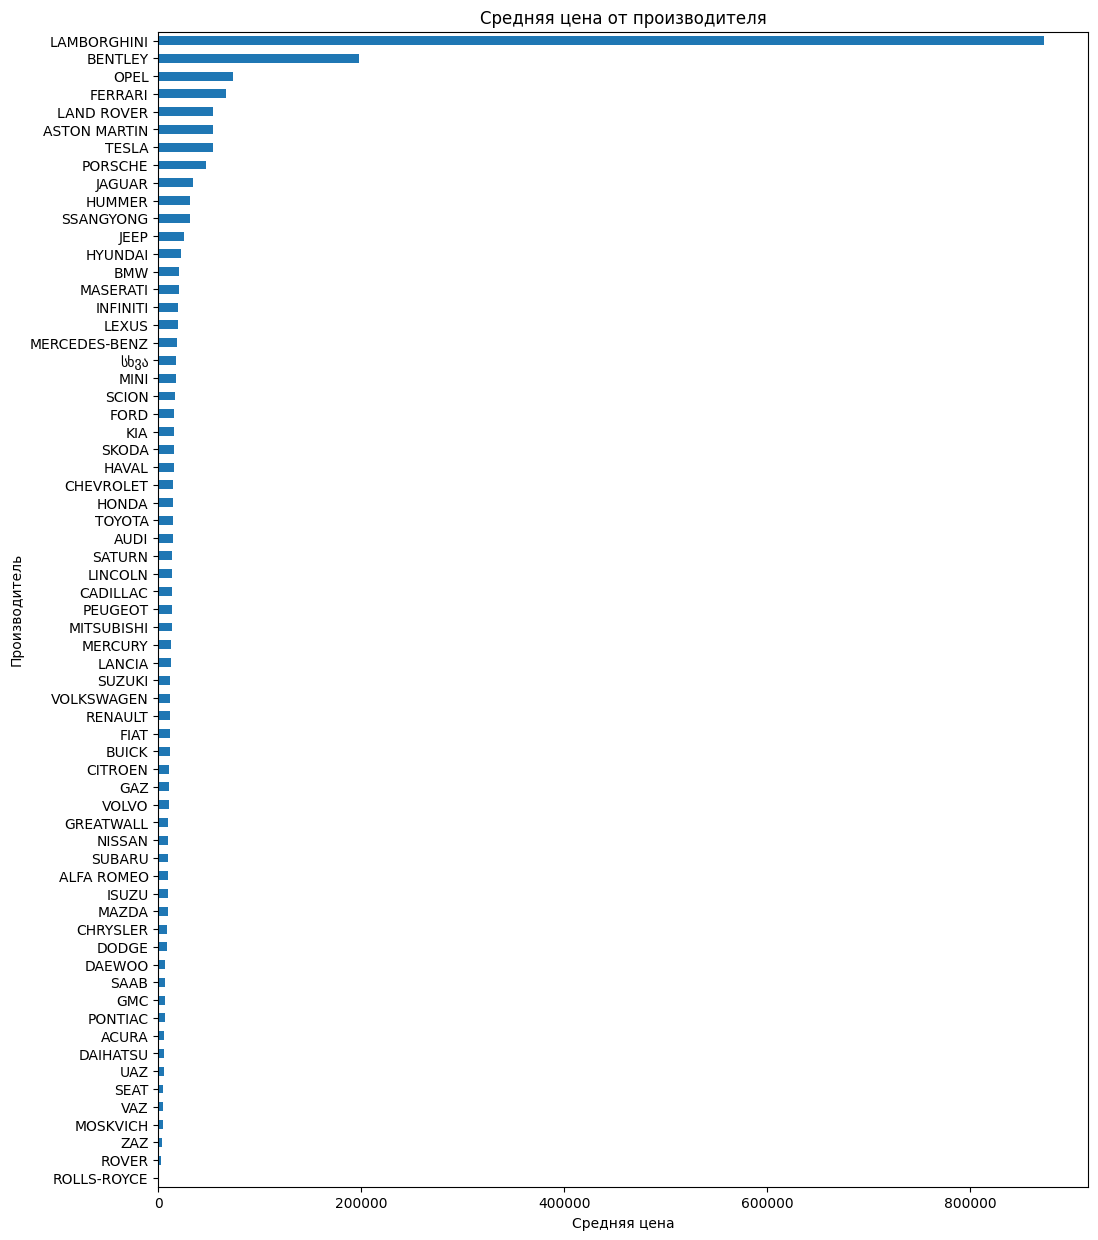

In [8]:
plt.figure(figsize=(12, 15))
car_price_enc.groupby('Manufacturer')['Price'].mean().sort_values().plot(kind='barh')
plt.title('Средняя цена от производителя')
plt.ylabel('Производитель')
plt.xlabel('Средняя цена')
plt.show()
# реализация графика Распределение цен по производителям

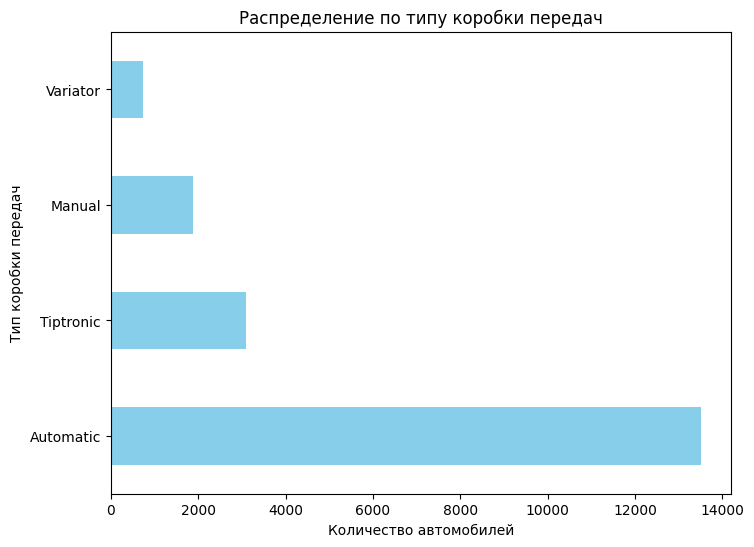

In [9]:
gearbox_distribution = car_price_enc['Gear box type'].value_counts()
plt.figure(figsize=(8, 6))
gearbox_distribution.plot(kind='barh', color='skyblue')
plt.title('Распределение по типу коробки передач')
plt.ylabel('Тип коробки передач')
plt.xlabel('Количество автомобилей')
plt.show()

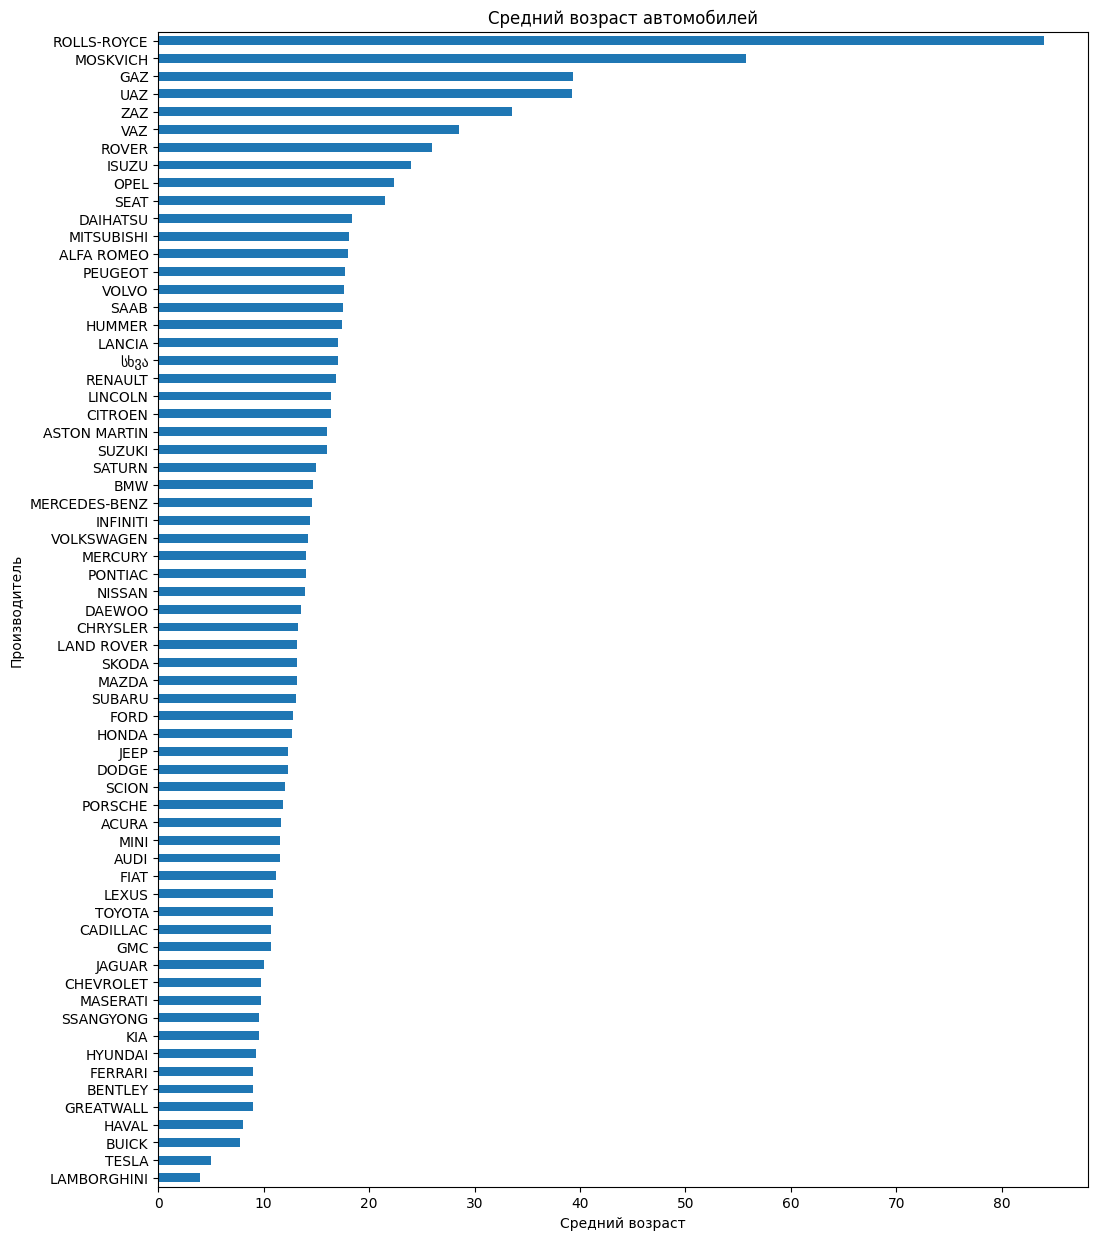

In [10]:
car_price_enc['Age'] = 2023 - car_price_enc['Prod. year']
plt.figure(figsize=(12, 15))
# График среднего возраста автомобилей
average_age = car_price_enc.groupby('Manufacturer')['Age'].mean().sort_values()
average_age.plot(kind='barh', title='Средний возраст автомобилей')
plt.ylabel('Производитель')
plt.xlabel('Средний возраст')
plt.show()



Раритетные автомобили

In [11]:
vintage_cars = car_price_enc[(2023 - car_price_enc['Prod. year'] > 25) & (car_price_enc['Price'] > 35000)]
vintage_cars

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
2151,45709629,47042,3292,BMW,540 I,1995,Sedan,Yes,Petrol,4.0,173000.0,8.0,Manual,Rear,04-May,Left wheel,Black,12,28
3111,45798484,51746,0,GAZ,20,1953,Sedan,No,Petrol,2.0,0.0,4.0,Manual,Rear,04-May,Left wheel,Beige,0,70
4621,45758388,43905,0,MERCEDES-BENZ,G 320,1994,Jeep,Yes,Petrol,3.2,200000.0,6.0,Automatic,4x4,04-May,Left wheel,Black,0,29
4994,45806383,40769,0,MERCEDES-BENZ,G 55 AMG,1996,Jeep,Yes,Petrol,5.5,180000.0,8.0,Automatic,4x4,02-Mar,Left wheel,Black,8,27
5940,44284487,54882,0,MERCEDES-BENZ,G 350,1995,Jeep,Yes,Diesel,3.2,213700.0,6.0,Tiptronic,4x4,04-May,Left wheel,Silver,8,28
5971,45757478,40769,0,MERCEDES-BENZ,C 180,1996,Sedan,No,Petrol,1.8,212485.0,8.0,Manual,Rear,04-May,Left wheel,Green,2,27
6607,32171534,119172,0,MERCEDES-BENZ,230 W153,1943,Sedan,Yes,Petrol,2.2,69000.0,4.0,Automatic,Rear,04-May,Left wheel,White,0,80
7667,45798721,65858,0,FORD,Mustang,1965,Coupe,Yes,Petrol,4.7,68800.0,8.0,Automatic,Front,02-Mar,Left wheel,Red,2,58
13973,45800758,64290,3965,FORD,Mustang,1965,Coupe,Yes,Petrol,4.7,1142.0,8.0,Automatic,Rear,02-Mar,Left wheel,Red,12,58


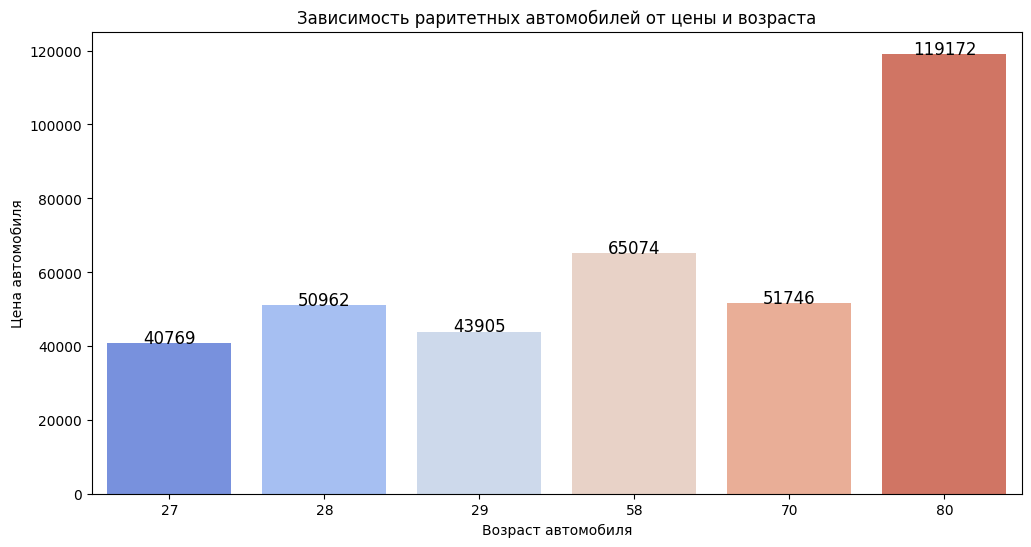

In [12]:

plt.figure(figsize=(12, 6))


ax = sns.barplot(data=vintage_cars, x='Age', y='Price', ci=None, palette='coolwarm')


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=12)

plt.title('Зависимость раритетных автомобилей от цены и возраста')
plt.xlabel('Возраст автомобиля')
plt.ylabel('Цена автомобиля')

plt.show()


Возраст этих автомобилей высок, как и цена, что может ухудшить модель, поэтому мы уберем раритетные автомобили из нашего датасета, и сделаем модель отдельно для них

In [13]:
car_price_enc = car_price_enc[(2023 - car_price_enc['Prod. year'] <= 25) | (car_price_enc['Price'] <= 35000)]


In [17]:
car_price_enc.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Age'],
      dtype='object')

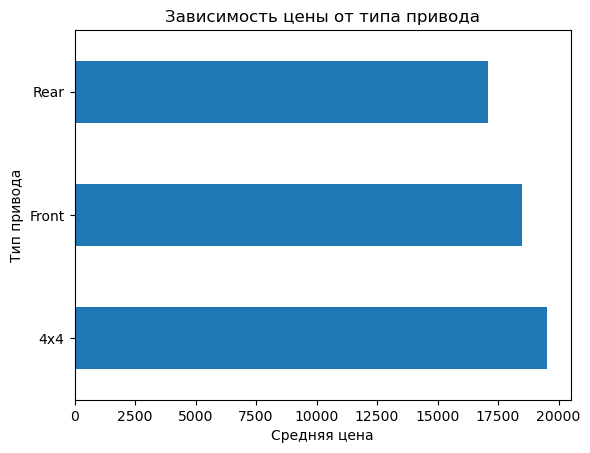

In [18]:
drive_wheels_prices = car_price_enc.groupby('Drive wheels')['Price'].mean()


drive_wheels_prices.plot(kind='barh')
plt.title('Зависимость цены от типа привода')
plt.ylabel('Тип привода')
plt.xlabel('Средняя цена')
plt.show()

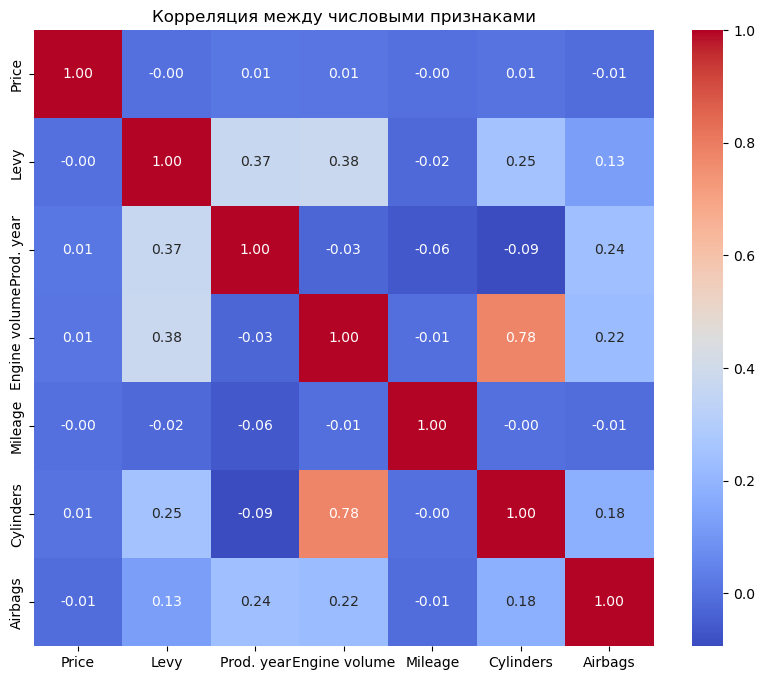

In [19]:
numeric_features = ['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']

# Создание корреляционной матрицы
corr_matrix = car_price_enc[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между числовыми признаками')
plt.show()

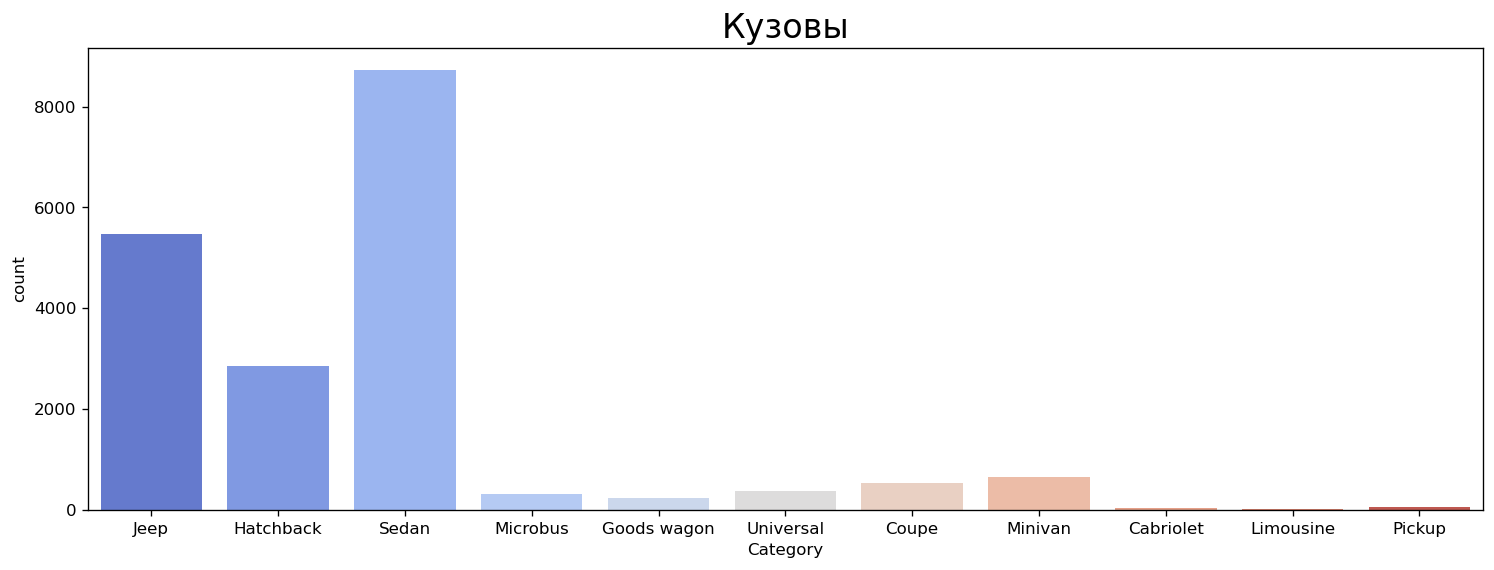

In [20]:
plt.subplots(figsize=(15,5), dpi=120)

sns.countplot(data= car_price_enc, x='Category',palette='coolwarm')
plt.title("Кузовы",fontsize=20)
plt.show()

In [21]:

average_price = car_price_enc['Price'].mean()

median_price = car_price_enc['Price'].median()


max_price = car_price_enc['Price'].max()


min_price = car_price_enc['Price'].min()


average_mileage = car_price_enc['Mileage'].mean()


average_engine_volume = car_price_enc['Engine volume'].mean()

print("Average car price:", average_price)
print("Median car price:", median_price)
print("Maximum car price:", max_price)
print("Minimum car price:", min_price)
print("Average car mileage:", average_mileage)
print("Average engine volume:", average_engine_volume)

Average car price: 18537.13017474516
Median car price: 13172.0
Maximum car price: 26307500
Minimum car price: 1
Average car mileage: 1532894.726284585
Average engine volume: 2.307442271687123


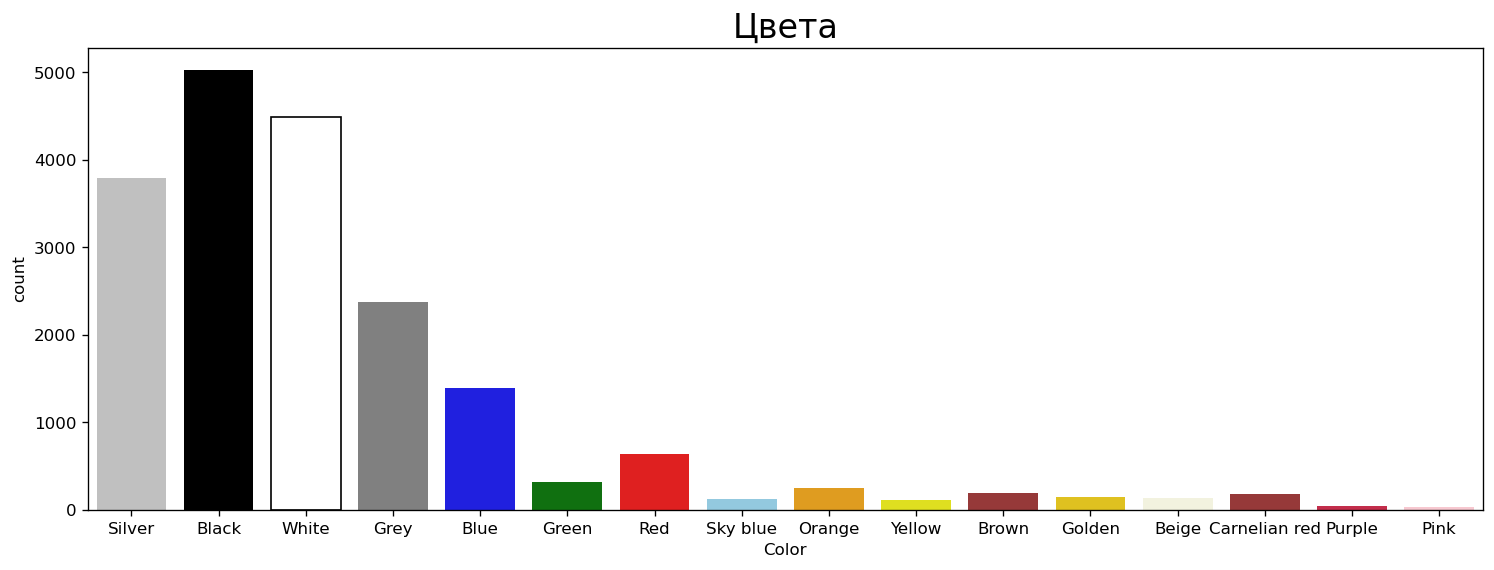

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


car_price_enc['Color'] = car_price_enc['Color'].astype(str)

colors = ['silver', 'black', 'white', 'gray', 'blue', 'green', 'red', 'skyblue', 'orange', 'yellow', 
          'brown', 'gold', 'beige', 'brown', 'crimson', 'pink']


plt.subplots(figsize=(15, 5), dpi=120)
sns.countplot(data=car_price_enc, x='Color', palette=colors, edgecolor=['black' if color == 'white' else 'none' for color in colors])


plt.title("Цвета", fontsize=20)


plt.show()


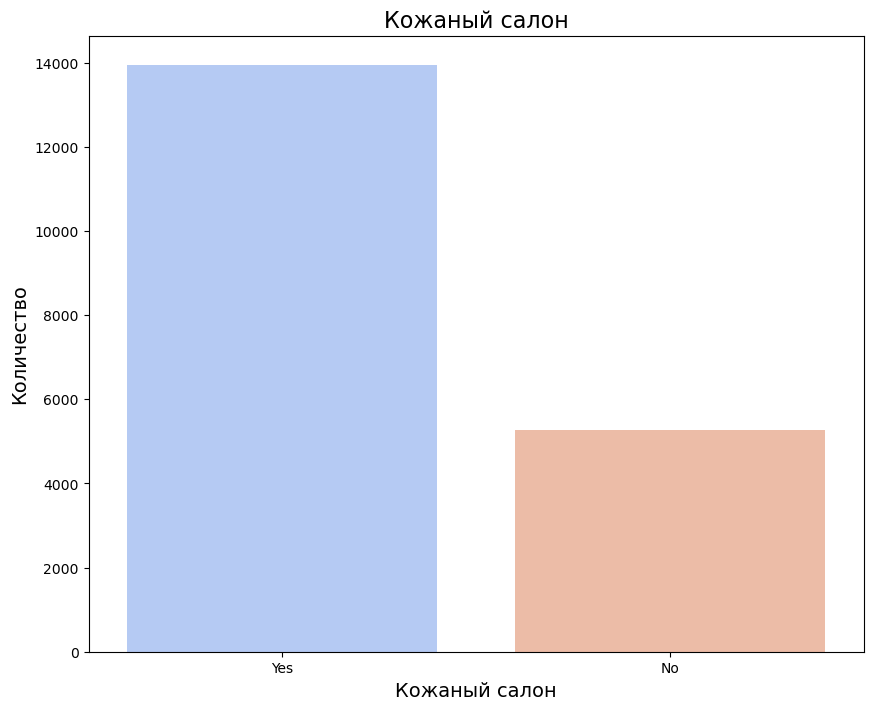

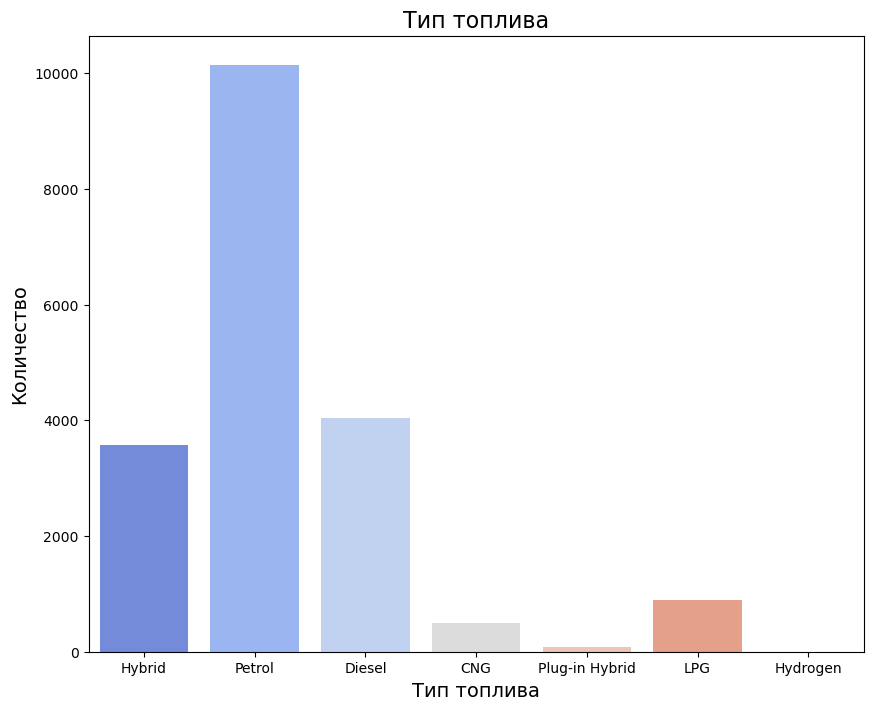

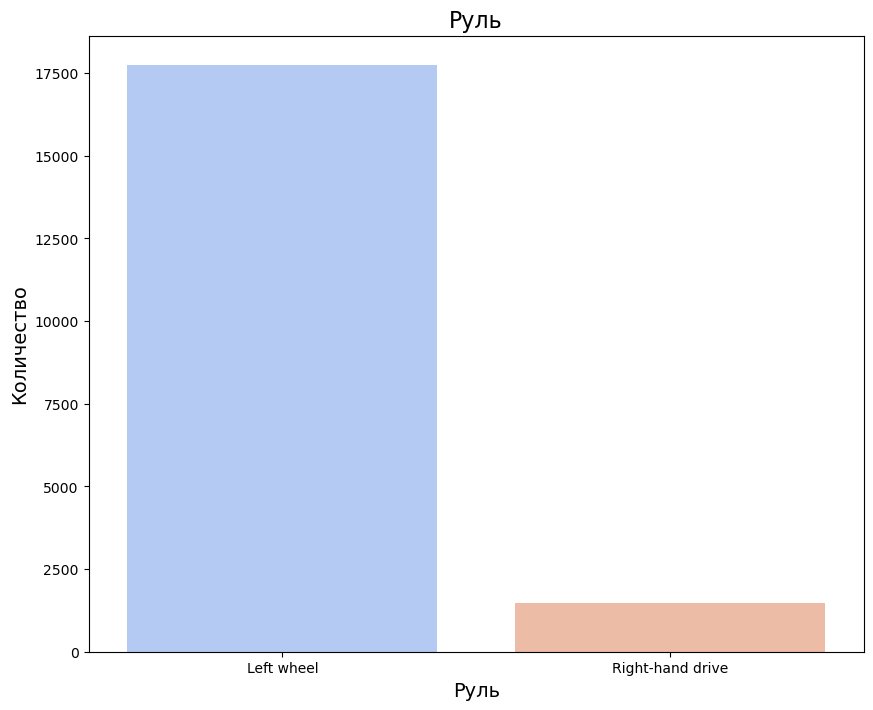

In [23]:
columns = ['Leather interior', 'Fuel type', 'Wheel']

translations = {'Leather interior': 'Кожаный салон', 'Fuel type': 'Тип топлива', 'Wheel': 'Руль'}

for col in columns:
    plt.figure(figsize=(10, 8))
  
    sns.countplot(data=car_price_enc, x=col, palette='coolwarm')
    plt.title(translations[col], fontsize=16)
    plt.xlabel(translations[col], fontsize=14)
    plt.ylabel('Количество', fontsize=14)
    plt.show()


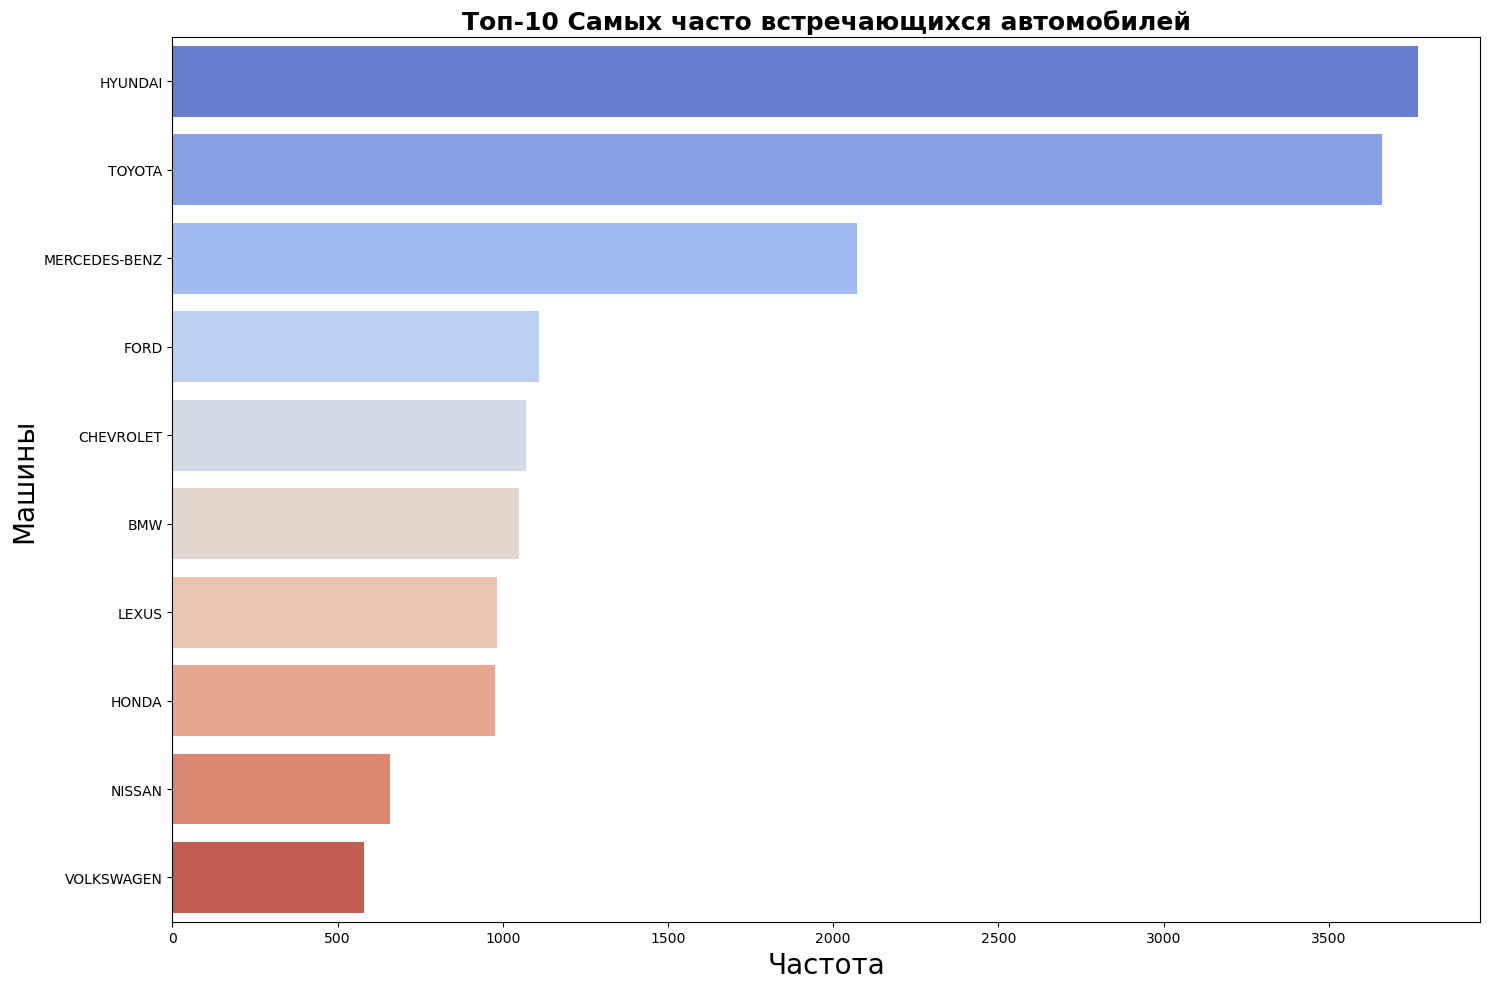

In [24]:
top_10_cars = car_price_enc.Manufacturer.value_counts().sort_values(ascending=False)[:10]

plt.figure(figsize=(15, 10))
sns.barplot(x=top_10_cars, y=top_10_cars.index,palette='coolwarm',linewidth = 4)
plt.title('Топ-10 Самых часто встречающихся автомобилей',loc='center',fontweight='bold',fontsize=18)
plt.xlabel('Частота',fontsize=20)
plt.ylabel('Машины',fontsize=20)
plt.tight_layout()
plt.show()

In [25]:
car_price_enc.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,13
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,12
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2,17
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0,12
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4,9


In [14]:
categorical_columns = ['Manufacturer', 'Prod. year','Category','Fuel type','Gear box type','Wheel','Leather interior','Drive wheels','Doors']

car_price_enc = pd.get_dummies(car_price_enc, columns=categorical_columns)


In [15]:
label_endcoder = LabelEncoder()


for i in car_price_enc.columns:
    
    if type(car_price_enc[i][0]) == str:
        car_price_enc[i] = label_endcoder.fit_transform(car_price_enc[i])
car_price_enc

,ID,Price,Levy,Model,Engine volume,Mileage,Cylinders,Color,Airbags,Age,...,Wheel_Left wheel,Wheel_Right-hand drive,Leather interior_No,Leather interior_Yes,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5
0,45654403,13328,1399,1239,3.5,186005.0,6.0,12,12,13,...,1,0,0,1,1,0,0,0,1,0
1,44731507,16621,1018,656,3.0,192000.0,6.0,1,8,12,...,1,0,1,0,1,0,0,0,1,0
2,45774419,8467,0,682,1.3,200000.0,4.0,1,2,17,...,0,1,1,0,0,1,0,0,1,0
3,45769185,3607,862,659,2.5,168966.0,4.0,14,0,12,...,1,0,0,1,1,0,0,0,1,0
4,45809263,11726,446,682,1.3,91901.0,4.0,12,4,9,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,383,2.0,300000.0,4.0,12,5,24,...,1,0,0,1,0,0,1,1,0,0
19233,45778856,15681,831,1331,2.4,161600.0,4.0,11,8,12,...,1,0,0,1,0,1,0,0,1,0
19234,45804997,26108,836,1439,2.0,116365.0,4.0,7,4,13,...,1,0,0,1,0,1,0,0,1,0
19235,45793526,5331,1288,454,2.0,51258.0,4.0,1,4,16,...,1,0,0,1,0,1,0,0,1,0


In [16]:

car_price_enc = car_price_enc.drop(['ID'],axis = 1)
car_price_enc

,Price,Levy,Model,Engine volume,Mileage,Cylinders,Color,Airbags,Age,Manufacturer_ACURA,...,Wheel_Left wheel,Wheel_Right-hand drive,Leather interior_No,Leather interior_Yes,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5
0,13328,1399,1239,3.5,186005.0,6.0,12,12,13,0,...,1,0,0,1,1,0,0,0,1,0
1,16621,1018,656,3.0,192000.0,6.0,1,8,12,0,...,1,0,1,0,1,0,0,0,1,0
2,8467,0,682,1.3,200000.0,4.0,1,2,17,0,...,0,1,1,0,0,1,0,0,1,0
3,3607,862,659,2.5,168966.0,4.0,14,0,12,0,...,1,0,0,1,1,0,0,0,1,0
4,11726,446,682,1.3,91901.0,4.0,12,4,9,0,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,383,2.0,300000.0,4.0,12,5,24,0,...,1,0,0,1,0,0,1,1,0,0
19233,15681,831,1331,2.4,161600.0,4.0,11,8,12,0,...,1,0,0,1,0,1,0,0,1,0
19234,26108,836,1439,2.0,116365.0,4.0,7,4,13,0,...,1,0,0,1,0,1,0,0,1,0
19235,5331,1288,454,2.0,51258.0,4.0,1,4,16,0,...,1,0,0,1,0,1,0,0,1,0


In [17]:
car_price_enc['Price'] = car_price_enc['Price'].apply(int)
car_price_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19228 entries, 0 to 19236
Columns: 158 entries, Price to Doors_>5
dtypes: float64(3), int32(2), int64(4), uint8(149)
memory usage: 4.6 MB


In [18]:
#разделение на выборки
X = car_price_enc.drop('Price', axis = 1)
y = car_price_enc['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
tpot = TPOTRegressor(generations= 7, population_size=30, verbosity=2, scoring = 'r2' )
tpot.fit(X_train, y_train)

#Оценка модели
print(tpot.score(X_test, y_test))

#Экспорт обученной модели
tpot.export('tpot_regressor_pipeline.py')

                                                                               
Generation 1 - Current best internal CV score: 0.4734939998890913
                                                                             
Generation 2 - Current best internal CV score: 0.4802228796016702
                                                                              
Generation 3 - Current best internal CV score: 0.4802228796016702
                                                                                
Generation 4 - Current best internal CV score: 0.4802228796016702
                                                                              
Generation 5 - Current best internal CV score: 0.49129128515660503
                                                                              
Generation 6 - Current best internal CV score: 0.49941228888686534
                                                                              
Generation 7 - Current best internal CV score: 

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
trot = GradientBoostingRegressor( alpha=0.9, learning_rate=0.5, loss='huber', max_depth=9, max_features=0.4, min_samples_leaf=6, min_samples_split=6, n_estimators=100, subsample=0.9500000000000001)
trot.fit(X_train, y_train)


y_pred = trot.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f"R^2: {r2}")

Mean Squared Error: 83914442.37
Mean Absolute Error: 4721.16
RMSE: 9160.48
R^2: 0.7215856893450251


In [22]:

from sklearn.ensemble import ExtraTreesRegressor
ExTresR = ExtraTreesRegressor( bootstrap=False, max_features=0.5, min_samples_leaf=4, min_samples_split=14, n_estimators=100)
ExTresR.fit(X_train, y_train)


y_pred =ExTresR.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f"R^2: {r2}")

Mean Squared Error: 1418209460.03
Mean Absolute Error: 6208.19
RMSE: 37659.12
R^2: -3.705385604977984


In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import make_scorer


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


model = GradientBoostingRegressor(n_estimators=50, random_state=42)  
parameters = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}


grid_search = GridSearchCV(model, parameters, scoring={'MSE': make_scorer(mean_squared_error), 'R^2': make_scorer(r2_score)}, refit='R^2', cv=3)
grid_search.fit(X_train, y_train)


best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_


y_pred_best = best_estimator.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)


mae = mean_absolute_error(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print('Best Parameters:', best_params)
print('Best MSE:', mse_best)
print('Best R^2:', r2_best)
print('Best RMSE:', np.sqrt(mse_best))

Mean Absolute Error (MAE): 4471.082057298658
Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}
Best MSE: 266235668.71696177
Best R^2: 0.11667386347137743
Best RMSE: 16316.7297188181


In [23]:
from catboost import CatBoostRegressor


catboost_model1 = CatBoostRegressor(loss_function='MAE', iterations=600, learning_rate=0.11, depth=8)
catboost_model1.fit(X_train, y_train, verbose=100)


y_pred = catboost_model1.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f"R^2: {r2}")


0:	learn: 13012.5303809	total: 141ms	remaining: 1m 24s
100:	learn: 6891.4108555	total: 603ms	remaining: 2.98s
200:	learn: 6073.6065690	total: 1.06s	remaining: 2.1s
300:	learn: 5684.0055114	total: 1.54s	remaining: 1.53s
400:	learn: 5456.8574815	total: 2.01s	remaining: 997ms
500:	learn: 5284.5651223	total: 2.46s	remaining: 487ms
599:	learn: 5165.9284517	total: 2.94s	remaining: 0us
Mean Squared Error: 81559367.01
Mean Absolute Error: 4471.08
RMSE: 9031.02
R^2: 0.729399441835782


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression



param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100, 1000]
}

grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train, y_train)
best_ridge = grid_ridge.best_estimator_

param_grid_lasso = {
    'alpha': [0.1, 1, 10, 100, 1000]
}

grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_lasso.fit(X_train, y_train)
best_lasso = grid_lasso.best_estimator_

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_



models = [
    ('Random Forest', best_rf),
    ('Ridge Regression', best_ridge),
    ('Lasso Regression', best_lasso),
    ('Gradient Boosting', best_gb)
]

for model_name, model in models:
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Model: {model_name}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f"R^2: {r2:.2f}")
    print('--------------------------')


Model: Random Forest
Mean Squared Error: 382771215.40
Mean Absolute Error: 12318.01
RMSE: 19564.54
R^2: -0.27
--------------------------
Model: Ridge Regression
Mean Squared Error: 289273040.17
Mean Absolute Error: 11451.78
RMSE: 17008.03
R^2: 0.04
--------------------------
Model: Lasso Regression
Mean Squared Error: 367998785.02
Mean Absolute Error: 12097.04
RMSE: 19183.29
R^2: -0.22
--------------------------
Model: Gradient Boosting
Mean Squared Error: 331536330.61
Mean Absolute Error: 5584.40
RMSE: 18208.14
R^2: -0.10
--------------------------


In [45]:
models

[('Random Forest',
  RandomForestRegressor(max_depth=4, max_features='log2', n_estimators=200)),
 ('Ridge Regression', Ridge(alpha=1000)),
 ('Lasso Regression', Lasso(alpha=1000)),
 ('Gradient Boosting',
  GradientBoostingRegressor(max_depth=5, n_estimators=300, random_state=42))]

In [26]:
import shap
explainer_your_model = shap.Explainer(catboost_model1)
shap_values_your_model = explainer_your_model.shap_values(X_test)

# SHAP для TPOT модели
explainer_tpot = shap.Explainer(trot)
shap_values_tpot = explainer_tpot.shap_values(X_test)

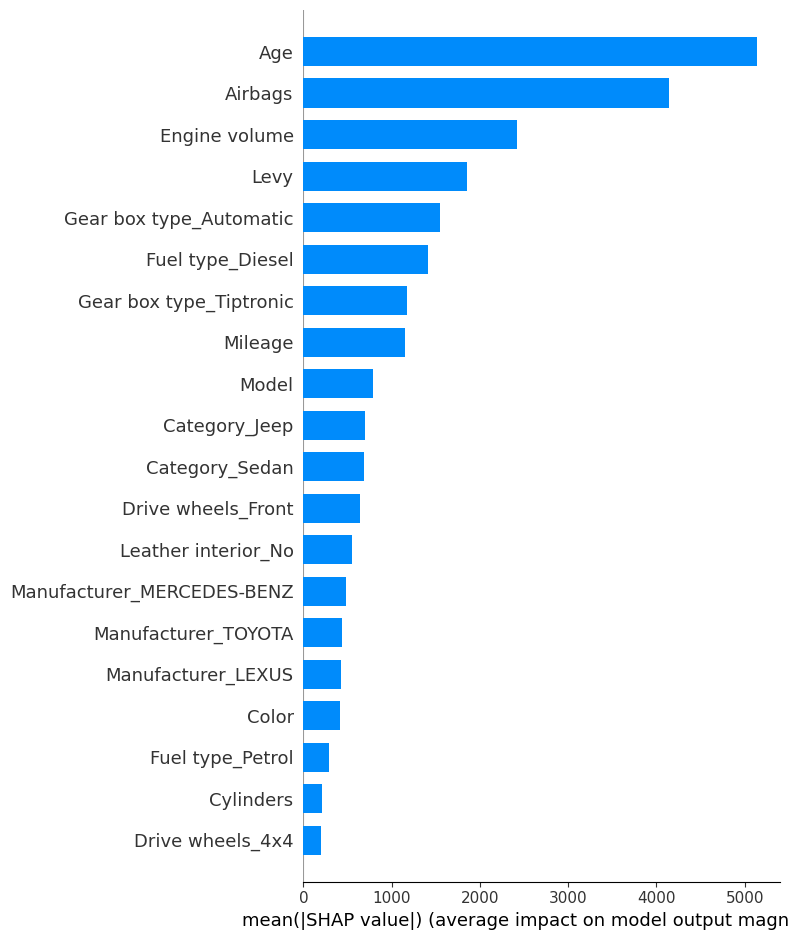

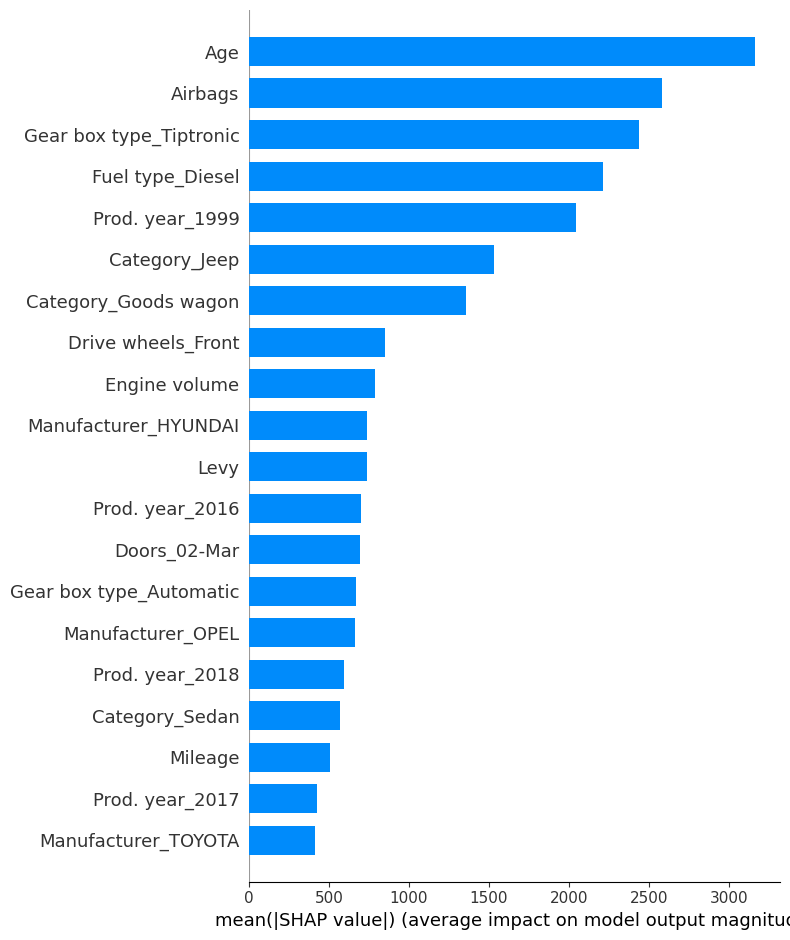

In [27]:
# График для нашей модели
shap.summary_plot(shap_values_your_model, X_test, plot_type="bar")

# График для TPOT модели
shap.summary_plot(shap_values_tpot, X_test, plot_type="bar")

In [48]:
X.columns

Index(['Levy', 'Model', 'Engine volume', 'Mileage', 'Cylinders', 'Color',
       'Airbags', 'Age', 'Manufacturer_ACURA', 'Manufacturer_ALFA ROMEO',
       ...
       'Wheel_Left wheel', 'Wheel_Right-hand drive', 'Leather interior_No',
       'Leather interior_Yes', 'Drive wheels_4x4', 'Drive wheels_Front',
       'Drive wheels_Rear', 'Doors_02-Mar', 'Doors_04-May', 'Doors_>5'],
      dtype='object', length=157)

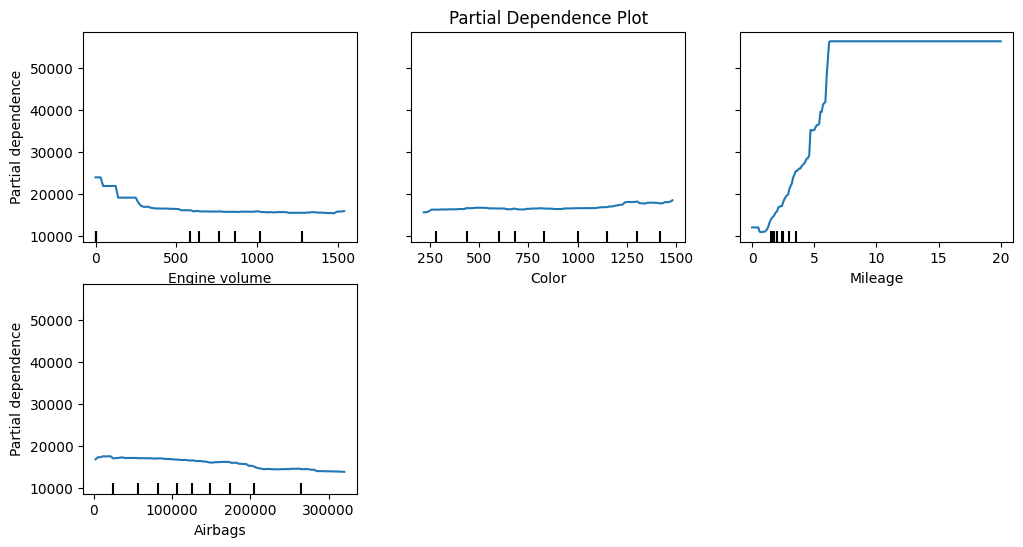

In [28]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

display = PartialDependenceDisplay.from_estimator(
    catboost_model1, X, ['Engine volume','Color','Mileage','Airbags'], feature_names=['Engine volume','Color','Mileage','Airbags'], ax=ax
    ,target=0
)


ax.set_title("Partial Dependence Plot")

plt.show()

In [29]:
print('Индекс' ,car_price_enc.index[car_price_enc['Price'] == 1].tolist())
car_price_enc[car_price_enc['Price'] == 1]

Индекс [7815, 16992]


,Price,Levy,Model,Engine volume,Mileage,Cylinders,Color,Airbags,Age,Manufacturer_ACURA,...,Wheel_Left wheel,Wheel_Right-hand drive,Leather interior_No,Leather interior_Yes,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5
7815,1,0,271,1.6,122231.0,4.0,12,4,24,0,...,1,0,0,1,0,1,0,0,1,0
16992,1,1202,934,1.6,200000.0,4.0,1,2,17,0,...,1,0,1,0,0,1,0,0,1,0


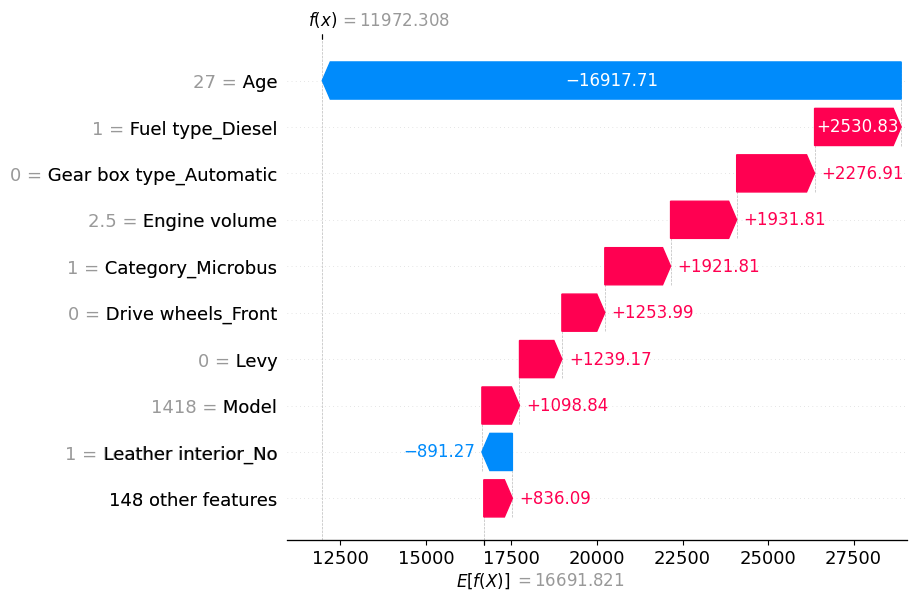

In [30]:

explainer = shap.Explainer(catboost_model1)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[car_price_enc.index[car_price_enc['Price'] == 1].tolist()[1]])

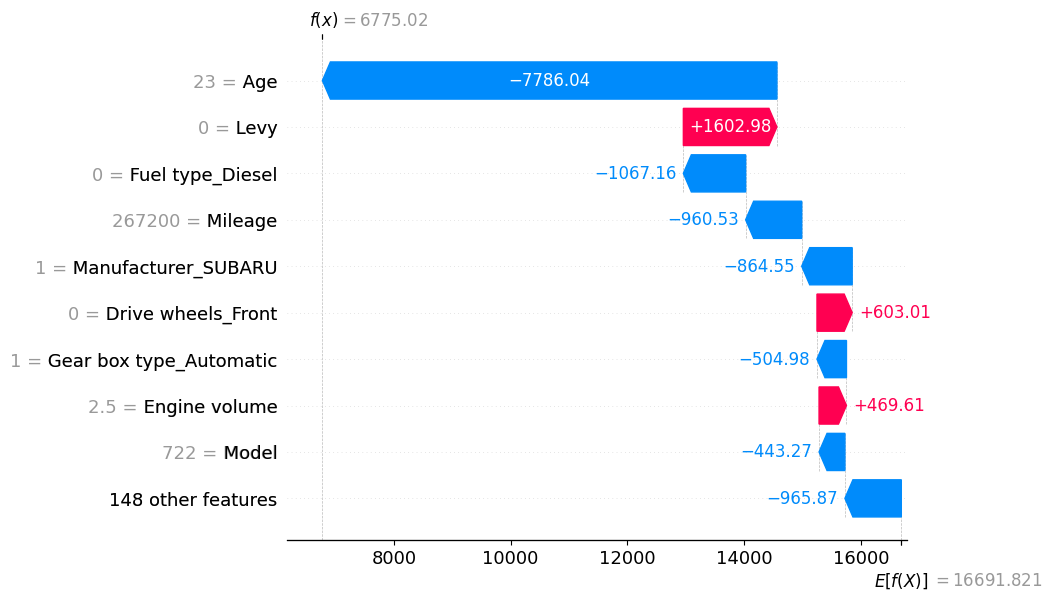

In [31]:
min_price_index = car_price_enc['Price'].idxmin()

explainer = shap.Explainer(catboost_model1)
shap_values = explainer(X)


shap.plots.waterfall(shap_values[min_price_index])

In [56]:
car_price_enc[car_price_enc['Price'] == max_price]

,Price,Levy,Model,Engine volume,Mileage,Cylinders,Color,Airbags,Age,Manufacturer_ACURA,...,Wheel_Left wheel,Wheel_Right-hand drive,Leather interior_No,Leather interior_Yes,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5
16983,26307500,0,489,1.7,99999.0,4.0,2,0,24,False,...,True,False,True,False,False,True,False,True,False,False


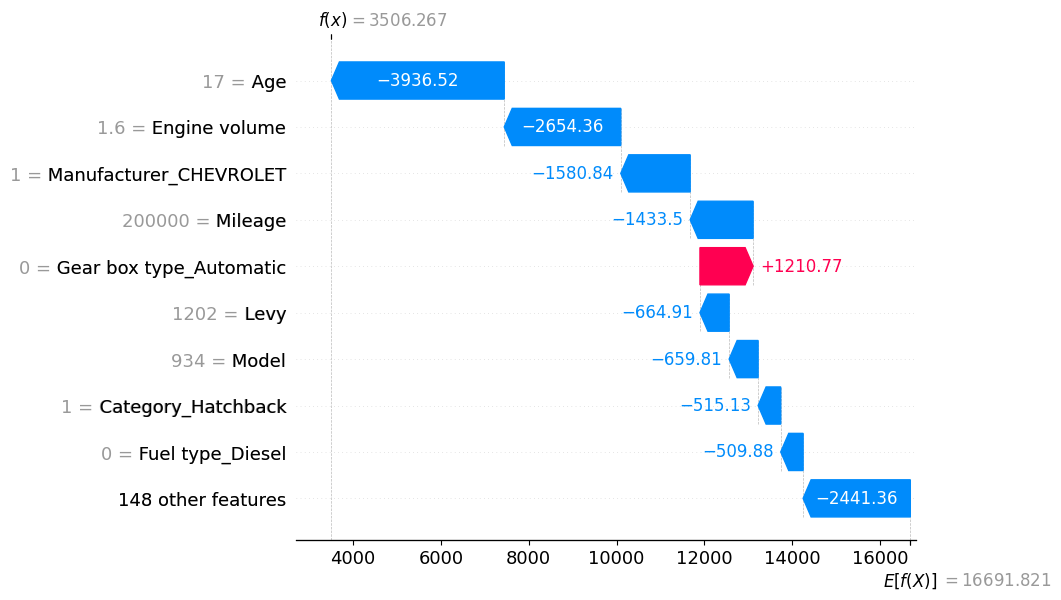

In [32]:
max_price_index = car_price_enc['Price'].idxmax()

explainer = shap.Explainer(catboost_model1)
shap_values = explainer(X)

# диаграмма “водопад” для наблюдения с самой высокой ценой
shap.plots.waterfall(shap_values[max_price_index])

In [33]:
y_pred = catboost_model1.predict(X_test)


df = pd.DataFrame({'Реальные значения': y_test, 'Предсказанные значения': y_pred})


df['Разница'] = df['Реальные значения'] - df['Предсказанные значения']


df

,Реальные значения,Предсказанные значения,Разница
341,12720,12781.662397,-61.662397
12164,8467,9639.496732,-1172.496732
18880,20385,28078.957729,-7693.957729
6183,392,393.626146,-1.626146
13123,2744,2649.071565,94.928435
...,...,...,...
1935,11447,19114.977330,-7667.977330
10989,25399,16959.868335,8439.131665
12417,3136,3290.908837,-154.908837
9974,43868,42415.905662,1452.094338


## ЧАСТЬ 2


Провдем предсказие цен автомобилей на выборке из среднего сегмента автомобилей

In [35]:
car_price_mid = car_price.copy()


In [36]:
def floati(x):
    s = list(map(str,x.split()))
    return float(s[0])
def levy(x):
    if x == '-':
        return 0
    return int(x)
car_price_mid['Engine volume'] = car_price_mid['Engine volume'].apply(floati)
car_price_mid['Mileage'] = car_price_mid['Mileage'].apply(floati)
car_price_mid['Levy'] = car_price_mid['Levy'].apply(levy)
car_price_mid['Age'] = 2023 - car_price_mid['Prod. year']

In [82]:
car_price_mid

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,13
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,12
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2,17
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0,12
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,24
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,12
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4,13
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4,16


In [37]:

# Выделение среднего сегмента автомобилей по цене
mid_segment =car_price_mid[(car_price_mid['Price'] >= 3000) & (car_price_mid['Price'] <= 25000)]

In [89]:

average_price = mid_segment['Price'].mean()


median_price = mid_segment['Price'].median()


max_price = mid_segment['Price'].max()


min_price = mid_segment['Price'].min()


average_mileage = mid_segment['Mileage'].mean()


average_engine_volume = mid_segment['Engine volume'].mean()

print("Average car price:", average_price)
print("Median car price:", median_price)
print("Maximum car price:", max_price)
print("Minimum car price:", min_price)
print("Average car mileage:", average_mileage)
print("Average engine volume:", average_engine_volume)

Average car price: 13045.855420649272
Median car price: 12701.0
Maximum car price: 25000
Minimum car price: 3000
Average car mileage: 1823619.945750452
Average engine volume: 2.1515629036424695


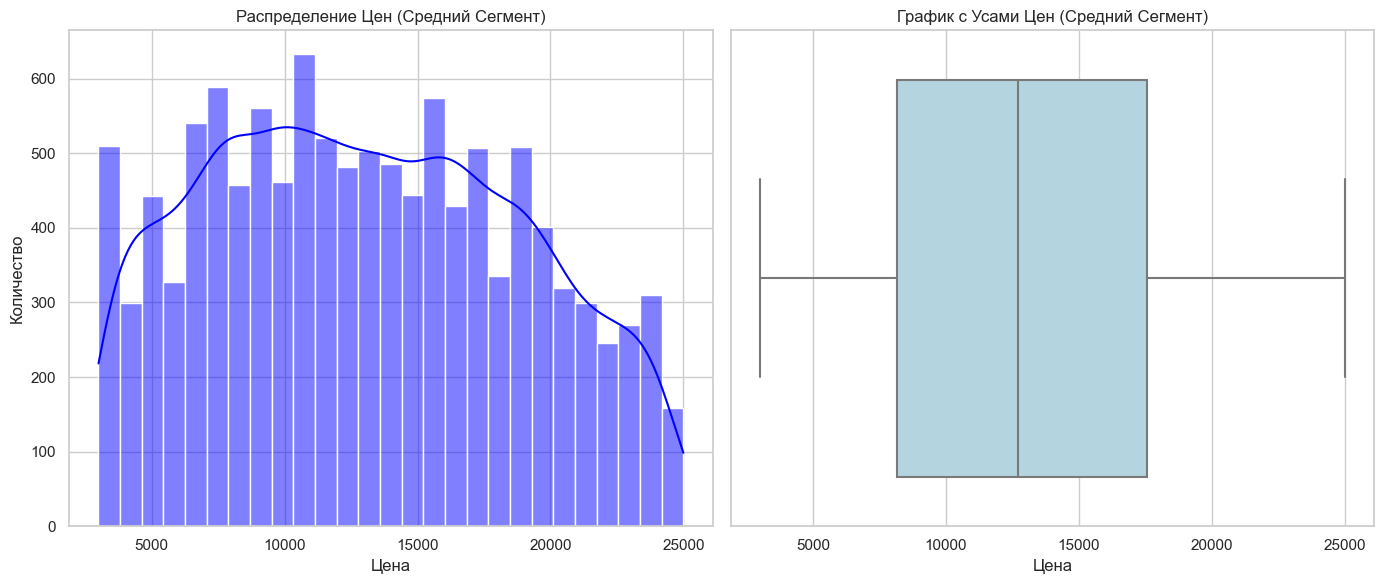

In [90]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.histplot(mid_segment['Price'], kde=True, color='blue')
plt.title('Распределение Цен (Средний Сегмент)')
plt.xlabel('Цена')
plt.ylabel('Количество')


plt.subplot(1, 2, 2)
sns.boxplot(x=mid_segment['Price'], color='lightblue')
plt.title('График с Усами Цен (Средний Сегмент)')
plt.xlabel('Цена')


plt.tight_layout()
plt.show()

обучение моделей на основе даннных из среднего сегмента автомобилей

In [38]:
cat_columns = ['Manufacturer', 'Prod. year','Category','Fuel type','Gear box type','Wheel','Leather interior','Drive wheels','Doors']

mid_segment = pd.get_dummies(mid_segment, columns=cat_columns)

In [92]:
mid_segment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11613 entries, 0 to 19235
Columns: 143 entries, ID to Doors_>5
dtypes: bool(133), float64(3), int64(5), object(2)
memory usage: 2.4+ MB


In [39]:
label_endcoder = LabelEncoder()


for i in mid_segment.columns:
    
    if type(mid_segment[i][0]) == str:
        mid_segment[i] = label_endcoder.fit_transform(mid_segment[i])
mid_segment

,ID,Price,Levy,Model,Engine volume,Mileage,Cylinders,Color,Airbags,Age,...,Wheel_Left wheel,Wheel_Right-hand drive,Leather interior_No,Leather interior_Yes,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5
0,45654403,13328,1399,969,3.5,186005.0,6.0,12,12,13,...,1,0,0,1,1,0,0,0,1,0
1,44731507,16621,1018,519,3.0,192000.0,6.0,1,8,12,...,1,0,1,0,1,0,0,0,1,0
2,45774419,8467,0,540,1.3,200000.0,4.0,1,2,17,...,0,1,1,0,0,1,0,0,1,0
3,45769185,3607,862,522,2.5,168966.0,4.0,14,0,12,...,1,0,0,1,1,0,0,0,1,0
4,45809263,11726,446,540,1.3,91901.0,4.0,12,4,9,...,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19226,45796788,7840,0,1024,3.0,220000.0,6.0,14,0,20,...,0,1,0,1,0,0,1,0,1,0
19231,45772306,5802,1055,472,3.5,107800.0,6.0,7,12,10,...,1,0,0,1,0,0,1,0,1,0
19232,45798355,8467,0,295,2.0,300000.0,4.0,12,5,24,...,1,0,0,1,0,0,1,1,0,0
19233,45778856,15681,831,1029,2.4,161600.0,4.0,11,8,12,...,1,0,0,1,0,1,0,0,1,0


In [94]:
mid_segment =  mid_segment.drop(['ID'],axis = 1)


In [40]:
mid_segment['Price'] = mid_segment['Price'].apply(int)
mid_segment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11613 entries, 0 to 19235
Columns: 143 entries, ID to Doors_>5
dtypes: float64(3), int32(2), int64(5), uint8(133)
memory usage: 2.6 MB


In [41]:
X1 = mid_segment.drop('Price', axis = 1)
y1 = mid_segment['Price']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

In [97]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, r2_score


# Создание модели градиентного бустинга
my_model1 = GradientBoostingRegressor(n_estimators=50, random_state=42)  

# Обучение модели на тренировочных данных
my_model1.fit(X1_train, y1_train)

#  прогноз на тестовых данных
y1_pred = my_model1.predict(X1_test)

mae = mean_absolute_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)
mse = mean_squared_error(y1_test, y1_pred)
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f"R^2: {r2}")


Mean Squared Error: 17101794.57
Mean Absolute Error: 3257.00
RMSE: 4135.43
R^2: 0.47315881667710014


In [98]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import make_scorer



X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)


model = GradientBoostingRegressor(n_estimators=50, random_state=42)  
parameters = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}


grid_search = GridSearchCV(model, parameters, scoring={'MSE': make_scorer(mean_squared_error), 'R^2': make_scorer(r2_score)}, refit='R^2', cv=3)
grid_search.fit(X1_train, y1_train)


best_estimator = grid_search.best_estimator_
best_params = grid_search.best_params_


y1_pred_best = best_estimator.predict(X1_test)
mse_best = mean_squared_error(y1_test, y1_pred_best)
r2_best = r2_score(y1_test, y1_pred_best)


mae = mean_absolute_error(y1_test, y1_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print('Best Parameters:', best_params)
print('Best MSE:', mse_best)
print('Best R^2:', r2_best)
print('Best RMSE:', np.sqrt(mse_best))

Mean Absolute Error (MAE): 3256.9992937590428
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Best MSE: 10749743.870143069
Best R^2: 0.6688413161167781
Best RMSE: 3278.6802024813383


In [42]:
from catboost import CatBoostRegressor


catboost_model_2 = CatBoostRegressor(loss_function='MAE', iterations=600, learning_rate=0.11,depth=11)
catboost_model_2.fit(X1_train, y1_train, verbose=100)


y1_pred = catboost_model_2.predict(X1_test)


mae = mean_absolute_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)
mse = mean_squared_error(y1_test, y1_pred)
rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f"R^2: {r2}")


0:	learn: 4660.7260574	total: 27.2ms	remaining: 16.3s
100:	learn: 1493.0944115	total: 2.68s	remaining: 13.3s
200:	learn: 1093.9749657	total: 5.29s	remaining: 10.5s
300:	learn: 920.6501448	total: 7.89s	remaining: 7.84s
400:	learn: 826.3638914	total: 10.5s	remaining: 5.2s
500:	learn: 748.1678004	total: 13.1s	remaining: 2.58s
599:	learn: 699.9943590	total: 15.6s	remaining: 0us
Mean Squared Error: 10232300.99
Mean Absolute Error: 2224.80
RMSE: 3198.80
R^2: 0.6847817614722794


In [108]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X1_train, y1_train)
best_rf = grid_rf.best_estimator_


param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100, 1000]
}
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X1_train, y1_train)
best_ridge = grid_ridge.best_estimator_


param_grid_lasso = {
    'alpha': [0.1, 1, 10, 100, 1000]
}
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_lasso.fit(X1_train, y1_train)
best_lasso = grid_lasso.best_estimator_


param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_gb.fit(X1_train, y1_train)
best_gb = grid_gb.best_estimator_


models = [
    ('Random Forest', RandomForestRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=50, random_state=42)),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso())
]

models = [
    ('Random Forest', best_rf),
    ('Ridge Regression', best_ridge),
    ('Lasso Regression', best_lasso),
    ('Gradient Boosting', best_gb)
]

for model_name, model in models:
    y_pred = model.predict(X1_test)
    mse = mean_squared_error(y1_test, y1_pred)
    r2 = r2_score(y1_test, y1_pred)
    mae = mean_absolute_error(y1_test, y1_pred)
    rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
    print(f'Model: {model_name}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f"R^2: {r2}")
    print('--------------------------')


Model: Random Forest
Mean Squared Error: 10032812.19
Mean Absolute Error: 2167.13
RMSE: 3167.46
R^2: 0.6909272518498966
--------------------------
Model: Ridge Regression
Mean Squared Error: 10032812.19
Mean Absolute Error: 2167.13
RMSE: 3167.46
R^2: 0.6909272518498966
--------------------------
Model: Lasso Regression
Mean Squared Error: 10032812.19
Mean Absolute Error: 2167.13
RMSE: 3167.46
R^2: 0.6909272518498966
--------------------------
Model: Gradient Boosting
Mean Squared Error: 10032812.19
Mean Absolute Error: 2167.13
RMSE: 3167.46
R^2: 0.6909272518498966
--------------------------


In [107]:
y_pred1 = catboost_model_2.predict(X_test)


df1 = pd.DataFrame({'Реальные значения': y_test, 'Предсказанные значения': y_pred1})


df1['Разница'] = df1['Реальные значения'] - df1['Предсказанные значения']


df1

,Реальные значения,Предсказанные значения,Разница
341,12720,13456.400561,-736.400561
12164,8467,8112.849945,354.150055
18880,20385,19389.296053,995.703947
6183,392,5425.598868,-5033.598868
13123,2744,13533.029245,-10789.029245
...,...,...,...
1935,11447,17165.460761,-5718.460761
10989,25399,14730.543213,10668.456787
12417,3136,3087.579986,48.420014
9974,43868,20153.665369,23714.334631
